Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [2]:
file = pd.read_excel("Precio/Precio_Bolsa_Nacional_($kwh)_1995.xlsx",header=2)

colname = ["fecha","hora","precio"]

data = []
for i in range(file.shape[0]):    
    for j in range(1,25):
        #print(str(file.iloc[i,0])+" "+str(j-1)+" "+str(file.iloc[i,j]))
        data.append([file.iloc[i,0],j-1,file.iloc[i,j]])      

In [3]:
data = []
for k in range(1995,2016):
    filename= "Precio/Precio_Bolsa_Nacional_($kwh)_"+str(k)+".xlsx"
    file = pd.read_excel(filename,header=2)    
    for i in range(file.shape[0]):
        for j in range(1,25):
            data.append([file.iloc[i,0],j-1,file.iloc[i,j]])   
            
for k in range(2016,2019):
    filename= "Precio/Precio_Bolsa_Nacional_($kwh)_"+str(k)+".xls"
    file = pd.read_excel(filename,header=2)    
    for i in range(file.shape[0]):
        for j in range(1,25):
            data.append([file.iloc[i,0],j-1,file.iloc[i,j]])       

df = pd.DataFrame(data,columns=colname)
df.head()

,fecha,hora,precio
0,1995-07-20,0,NaN
1,1995-07-20,1,1.073
2,1995-07-20,2,1.073
3,1995-07-20,3,1.073
4,1995-07-20,4,1.073


In [4]:
df.shape

(201816, 3)

**2.--** Compute e imprima el número de registros con datos faltantes.

In [5]:
(df.isna().sum()).sum()

454

**3.--** Compute e imprima el número de registros duplicados.

In [6]:
(df.duplicated()).sum()

1951

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [7]:
df1=df.drop_duplicates()
df1=df1.dropna()
df1.shape

(199819, 3)

In [8]:
df1.head()

,fecha,hora,precio
1,1995-07-20,1,1.073
2,1995-07-20,2,1.073
3,1995-07-20,3,1.073
4,1995-07-20,4,1.073
5,1995-07-20,5,1.073


**5.--** Compute y grafique el precio primedio diario.

In [8]:
df1.fecha = pd.to_datetime(df1.fecha)
df1['day'] = df1.fecha.dt.day
df1['month'] = df1.fecha.dt.month
df1['year'] = df1.fecha.dt.year
df1.head()

,fecha,hora,precio,day,month,year
1,1995-07-20,1,1.073,20,7,1995
2,1995-07-20,2,1.073,20,7,1995
3,1995-07-20,3,1.073,20,7,1995
4,1995-07-20,4,1.073,20,7,1995
5,1995-07-20,5,1.073,20,7,1995


In [10]:
prom_diario = df1.groupby(['day']).mean()[['precio']].reset_index()
prom_diario = prom_diario.rename(columns={'precio':'precio_prom_day'})
prom_diario.head()

,day,precio_prom_day
0,1,107.854329
1,2,108.913259
2,3,110.298928
3,4,111.968630
4,5,111.388790


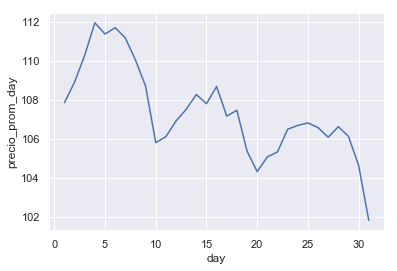

In [11]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="day", y="precio_prom_day", data=prom_diario)

**6.--** Compute y grafique el precio máximo por mes.

In [12]:
precio_max_mes = df1.groupby(['month']).max()[['precio']].reset_index()
precio_max_mes = precio_max_mes.rename(columns={'precio':'precio_max_mes'})
precio_max_mes.head()

,month,precio_max_mes
0,1,865.477082
1,2,869.442024
2,3,884.836657
3,4,807.500399
4,5,686.494571


Text(0.5, 1.0, 'Precio máximo por mes')

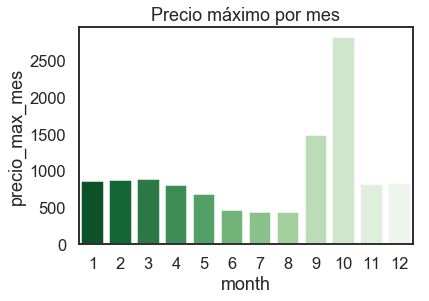

In [13]:
x=precio_max_mes['month']
y=precio_max_mes['precio_max_mes']
sns.set(style="white", context="talk")
sns.barplot(x=x, y=y, palette="Greens_r").set_title("Precio máximo por mes")

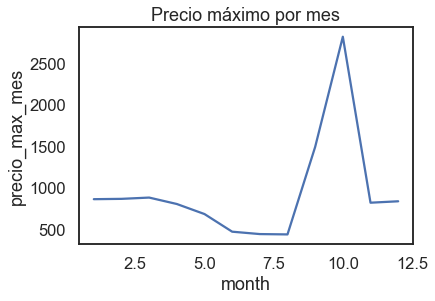

In [14]:
ax = sns.lineplot(x="month", y="precio_max_mes", data=precio_max_mes).set_title("Precio máximo por mes")

**7.--** Compute y grafique el precio mínimo mensual.

In [15]:
precio_min_mes = df1.groupby(['month']).min()[['precio']].reset_index()
precio_min_mes = precio_min_mes.rename(columns={'precio':'precio_min_mes'})
precio_min_mes.head()

,month,precio_min_mes
0,1,1.073
1,2,1.076
2,3,1.255
3,4,1.254
4,5,0.000


Text(0.5, 1.0, 'Precio mínimo por mes')

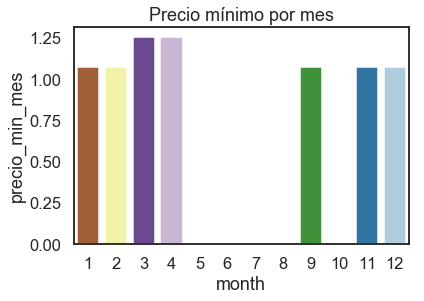

In [16]:
x=precio_min_mes['month']
y=precio_min_mes['precio_min_mes']
sns.set(style="white", context="talk")
sns.barplot(x=x, y=y, palette="Paired_r").set_title("Precio mínimo por mes")

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [17]:
prom_mes = df1.groupby('month').agg(['max','mean'])['precio'].reset_index()
prom_mes = prom_mes.rename(columns={'max':'precio_max','mean':'precio_prom'})
prom_mes.head()

,month,precio_max,precio_prom
0,1,865.477082,111.924490
1,2,869.442024,125.139288
2,3,884.836657,125.732944
3,4,807.500399,106.910424
4,5,686.494571,91.602250


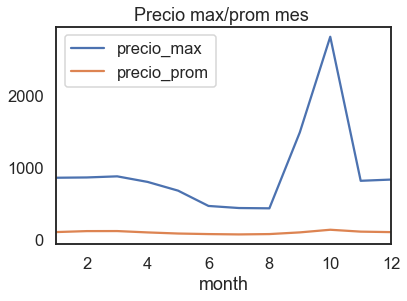

In [18]:
prom_mes.plot(x='month', y=['precio_max','precio_prom'] , title='Precio max/prom mes ')

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [19]:
df1['hora'] = df1['hora'].astype(int)
df1['día'] = df1['fecha'].dt.day_name()
df1.head()

,fecha,hora,precio,day,month,year,día
1,1995-07-20,1,1.073,20,7,1995,Thursday
2,1995-07-20,2,1.073,20,7,1995,Thursday
3,1995-07-20,3,1.073,20,7,1995,Thursday
4,1995-07-20,4,1.073,20,7,1995,Thursday
5,1995-07-20,5,1.073,20,7,1995,Thursday


In [20]:
df2 = df1[(df1['día'] == 'Monday') | 
(df1['día']== 'Tuesday')| 
(df1['día'] == 'Wednesday')| 
(df1['día']== 'Thursday')| 
(df1['día'] == 'Friday')]
df2.head()

,fecha,hora,precio,day,month,year,día
1,1995-07-20,1,1.073,20,7,1995,Thursday
2,1995-07-20,2,1.073,20,7,1995,Thursday
3,1995-07-20,3,1.073,20,7,1995,Thursday
4,1995-07-20,4,1.073,20,7,1995,Thursday
5,1995-07-20,5,1.073,20,7,1995,Thursday


In [21]:
df3 = df2.loc[df2.groupby('fecha')['precio'].idxmax()]
df3.head()

,fecha,hora,precio,day,month,year,día
10,1995-07-20,10,2.827,20,7,1995,Thursday
43,1995-07-21,19,16.670,21,7,1995,Friday
115,1995-07-24,19,22.500,24,7,1995,Monday
139,1995-07-25,19,1.500,25,7,1995,Tuesday
163,1995-07-26,19,8.000,26,7,1995,Wednesday


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000137FD23FF98>]],
      dtype=object)

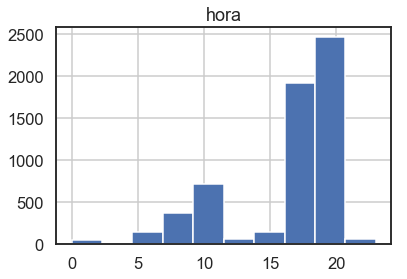

In [22]:
df3.hist(column='hora')

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

In [23]:
df4 = df1[(df1['día'] == 'Saturday')]
df4.head()

,fecha,hora,precio,day,month,year,día
48,1995-07-22,0,1.073,22,7,1995,Saturday
49,1995-07-22,1,1.073,22,7,1995,Saturday
50,1995-07-22,2,1.000,22,7,1995,Saturday
51,1995-07-22,3,1.000,22,7,1995,Saturday
52,1995-07-22,4,1.000,22,7,1995,Saturday


In [24]:
df4 = df4.loc[df4.groupby('fecha')['precio'].idxmax()]
df4.head()

,fecha,hora,precio,day,month,year,día
67,1995-07-22,19,2.500,22,7,1995,Saturday
228,1995-07-29,12,1.072,29,7,1995,Saturday
391,1995-08-05,7,2.558,5,8,1995,Saturday
560,1995-08-12,8,40.000,12,8,1995,Saturday
742,1995-08-19,22,2.000,19,8,1995,Saturday


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000137FAB5A7F0>]],
      dtype=object)

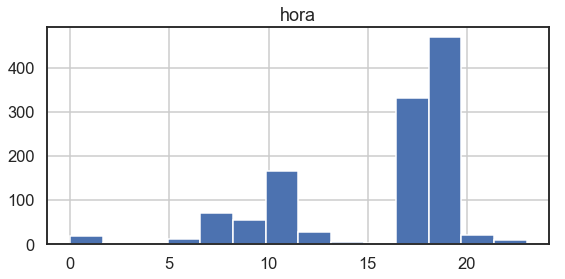

In [25]:
df4.hist(column='hora', bins=14, figsize=(9,4))

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

In [26]:
df5 = df1[(df1['día'] == 'Sunday')]
df5.head()

,fecha,hora,precio,day,month,year,día
72,1995-07-23,0,1.073,23,7,1995,Sunday
73,1995-07-23,1,1.000,23,7,1995,Sunday
74,1995-07-23,2,1.000,23,7,1995,Sunday
75,1995-07-23,3,1.000,23,7,1995,Sunday
76,1995-07-23,4,1.000,23,7,1995,Sunday


In [27]:
df5 = df5.loc[df5.groupby('fecha')['precio'].idxmax()]
df5.head()

,fecha,hora,precio,day,month,year,día
84,1995-07-23,12,1.238,23,7,1995,Sunday
252,1995-07-30,12,1.073,30,7,1995,Sunday
416,1995-08-06,8,3.200,6,8,1995,Sunday
584,1995-08-13,8,40.000,13,8,1995,Sunday
762,1995-08-20,18,3.100,20,8,1995,Sunday


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000137FAD512E8>]],
      dtype=object)

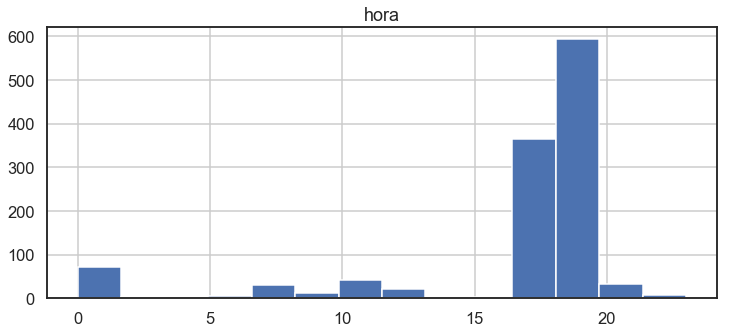

In [28]:
df5.hist(column='hora', bins=14, figsize=(12,5))

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [29]:
min_precio_year = df1.groupby('year').min()['precio'].reset_index()
min_precio_year = min_precio_year.rename(columns={'precio':'precio_min_year'})
min_precio_year

,year,precio_min_year
0,1995,0.000000
1,1996,0.000000
2,1997,10.882310
3,1998,13.847330
4,1999,18.359530
5,2000,21.531167
6,2001,24.822879
7,2002,26.777682
8,2003,37.013438
9,2004,32.252998


**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [32]:
df6 = df1.copy()
df6['Prom_precio_dia'] = df6['precio'].astype(float)
df6['Prom_precio_mes'] = df6['precio'].astype(float)
df6['fecha'] = pd.to_datetime(df6['fecha'])

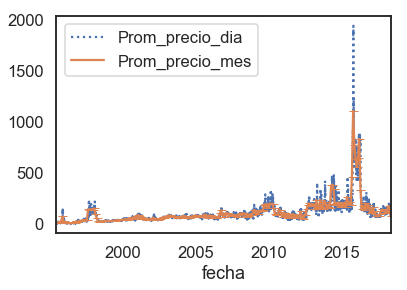

In [31]:
df6.groupby([df6['fecha'].dt.to_period('D')])['Prom_precio_dia'].mean().plot(style=':', legend= 'dia')
df6.groupby([df6['fecha'].dt.to_period('M')])['Prom_precio_mes'].mean().plot(style='-_', legend= 'mes')